# Homework Week 7

For each problem state:

the null and alternative hypotheses, whether the test is a one-tail or two-tailed test, conduct the appropriate test and the tests assumptions, state and support your conclusions.  Assume the outcome variable is ~N(μ,σ2) and α = .05.

Also evaluate the data based on the material reviewed in class, does the data seem to follow a normal distribution? are there outliers that could affect the data? if there are multiple samples do they have equal variance, does the data need to be transformed?

Not everything needs to be applied to every dataset, however, you must judge what are the most relevant plots or analysis to draw conclusions from the data based on the hypothesis.

**1. Null and Alternative Hypotheses**<br>
**2. One-sided or Two-sided**<br>
**3. Which tests are appropriate?**<br>
**4. Does the data follow a normal distribution?**<br>
**5. Are there outliers?**<br>
**6. If multiple samples, do they have equal variance? Does the data need to be transformed?**<br>

### A.

A random sample of 30 employes from a large financial organization has been selected to evaluate their learning performance after a series of seminars. Each subject was given a test that has a national average score of 50. Has the seminar programs statistically improved the scores of the employes?

These are the scores:

02 54 69 47 66 44 56 55 67 47 58 39 42 45 72 72 69 75 57 54 34 62 50 58 48 63
74 45 71 59

**1. Null and Alternative Hypotheses**<br>
- The null hypothesis states that there is no difference between the national average (50) and the post-seminar average.

**2. One-sided or Two-sided**<br>
One-sided (if you're only considering whether the scores have improved or not improved)

**3. Which tests are appropriate?**<br>
Two-sample t test

**4. Does the data follow a normal distribution?**<br>
The data appears to be roughly normal.

In [21]:
data <- c(2,
 54,
 69,
 47,
 66,
 44,
 56,
 55,
 67,
 47,
 58,
 39,
 42,
 45,
 72,
 72,
 69,
 75,
 57,
 54,
 34,
 62,
 50,
 58,
 48,
 63,
 74,
 45,
 71,
 59)

In [27]:
t.test(data, mu = 50, alternative="greater")


	One Sample t-test

data:  data
t = 1.8633, df = 29, p-value = 0.03629
alternative hypothesis: true mean is greater than 50
95 percent confidence interval:
 50.45219      Inf
sample estimates:
mean of x 
 55.13333 


A one-sided t-test shows a p-value of 0.03629. I would consider this to be a significant difference and conclude from this sample that the test scores have improved.

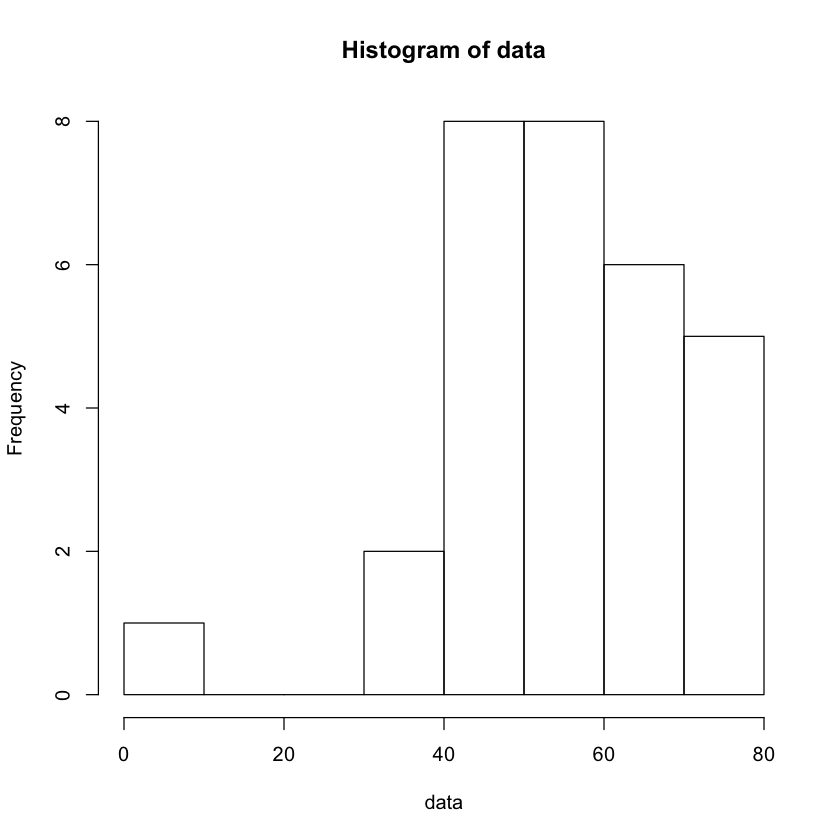

In [20]:
hist(data, breaks = 10)

**5. Are there outliers?**<br>
There is an outlier with a score of 2.

### B. 

A study looked at various cardiovascular risk factors in children, as measured at birth and during their first five years of life. One of the results for newborns were to study differences in bits per minute from two different races.
Based on the data, Is there evidence that the number of heart beats/min of newborn white children is fewer than that of newborn black children? 

The data is located in this working directory with the name Cardiovascular_children.csv

**1. Null and Alternative Hypotheses**<br>
Null hypothesis: black and white children have the same distribution of heart beats/min

**2. One-sided or Two-sided**<br>
One-sided (left)

**3. Which tests are appropriate?**<br>
One-sided t-test
Fisher's F test to check if they have the same variance.

With a high value of p-value of 0.5264, the fisher test seems to show that the variances are the same and we can conduct a two-sided t- test. A one-sided t-test returns a very small p-value and I would conclude that in this sample white children have a significantly lower heart rate than black children.


In [38]:
var.test(df[df$race == "white", ]$bpm, df[df$race == "black", ]$bpm)


	F test to compare two variances

data:  df[df$race == "white", ]$bpm and df[df$race == "black", ]$bpm
F = 1.258, num df = 120, denom df = 24, p-value = 0.5264
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6258819 2.2137149
sample estimates:
ratio of variances 
          1.257989 


In [39]:
t.test(df[df$race == "white", ]$bpm, df[df$race == "black", ]$bpm, alternative="less")


	Welch Two Sample t-test

data:  df[df$race == "white", ]$bpm and df[df$race == "black", ]$bpm
t = -5.7814, df = 37.589, p-value = 5.888e-07
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -8.776417
sample estimates:
mean of x mean of y 
 121.2893  133.6800 


**4. Does the data follow a normal distribution?**<br>
Yes.

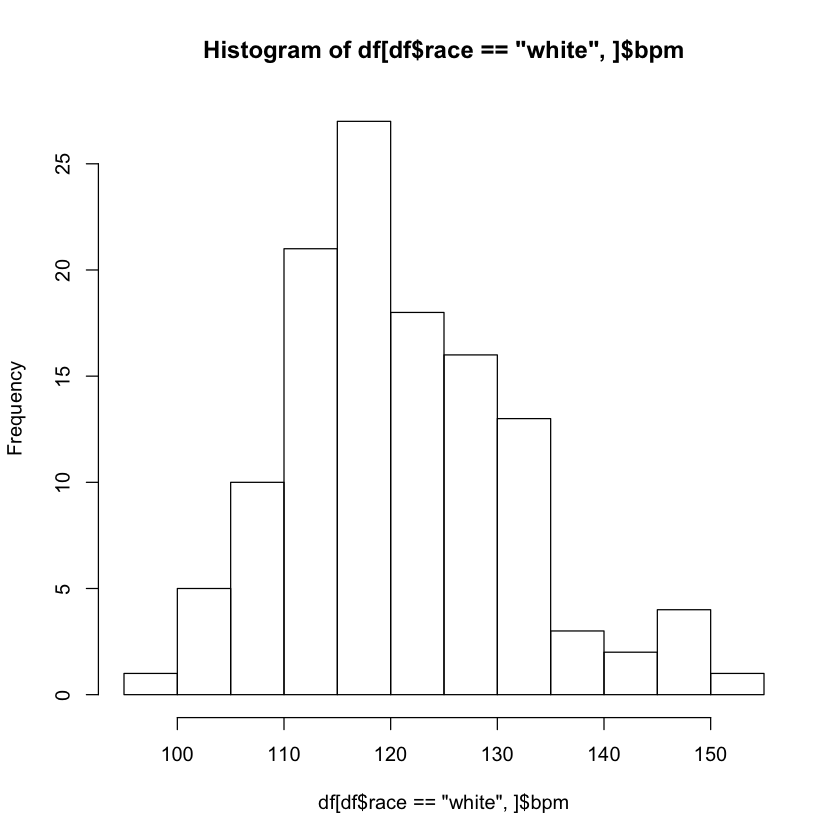

In [42]:
hist(df[df$race == "white", ]$bpm,)

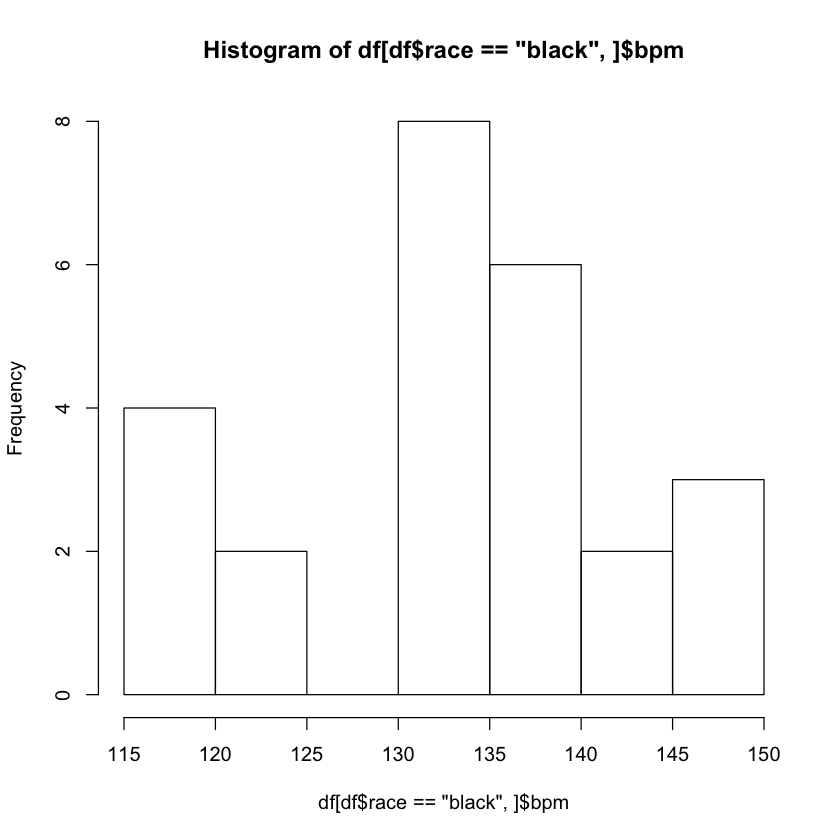

In [44]:
hist(df[df$race == "black", ]$bpm,)

**5. Are there outliers?**<br>
There are a small number of outliers which are not too far away from two standard deviations away from the mean.

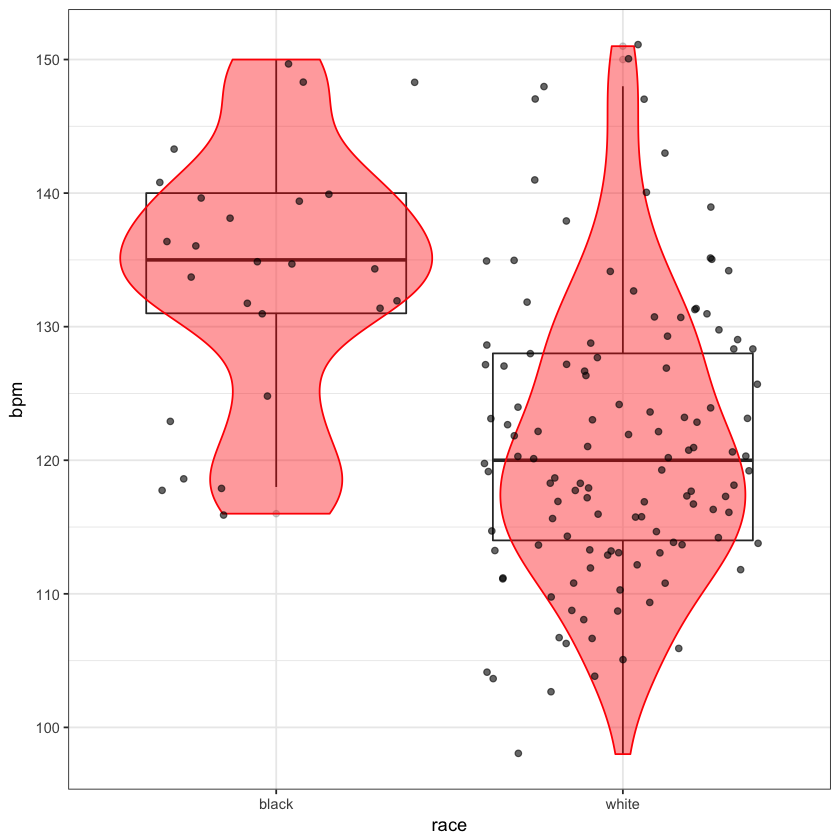

In [46]:
library(ggplot2)
ggplot(data = df, aes(x = race, y = bpm)) +
  geom_boxplot(alpha = 0.2) +
  geom_violin(fill='red', color='red',  alpha=0.4) +
  geom_jitter(alpha = 0.6, color = "black") + 
  theme_bw()

**6. If multiple samples, do they have equal variance? Does the data need to be transformed?**<br>
Yes, A Fisher's f-test (see above) showed that they had the same variance.

### C. 

A 1980 study was conducted whose purpose was to compare the indoor air quality in offices where smoking was permitted with that in offices where smoking was not permitted.  Measurements were made of carbon monoxide at 1:20 pm in work areas where smoking was permitted and in areas where smoking was prohibited with the following results:

Does CO vary differently in the two types of working environments?


The data is located in this working directory with the name smoking.csv

**1. Null and Alternative Hypotheses**<br>
Null hypothesis: CO **variance** (not mean) is the same in areas where smoking is allowed as in areas where smoking is not allowed. 

**2. One-sided or Two-sided**<br>
Two-sided

**3. Which tests are appropriate?**<br>
F test to check the variance. An F-test shows that the variances are *not* the same between the two samples.

In [52]:
smoking <- read.csv('smoking.csv')
head(smoking)

permitted,prohibited
3,7
1,4
5,2
5,7
9,4
8,9


In [53]:
var.test(smoking$permitted, smoking$prohibited)


	F test to compare two variances

data:  smoking$permitted and smoking$prohibited
F = 8.1647, num df = 24, denom df = 60, p-value = 4.716e-11
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  4.338988 16.981451
sample estimates:
ratio of variances 
          8.164657 


**4. Does the data follow a normal distribution?**<br>
The data where smoking is prohibited follows a normal distribution, although it is left-skewed. The other one does not.

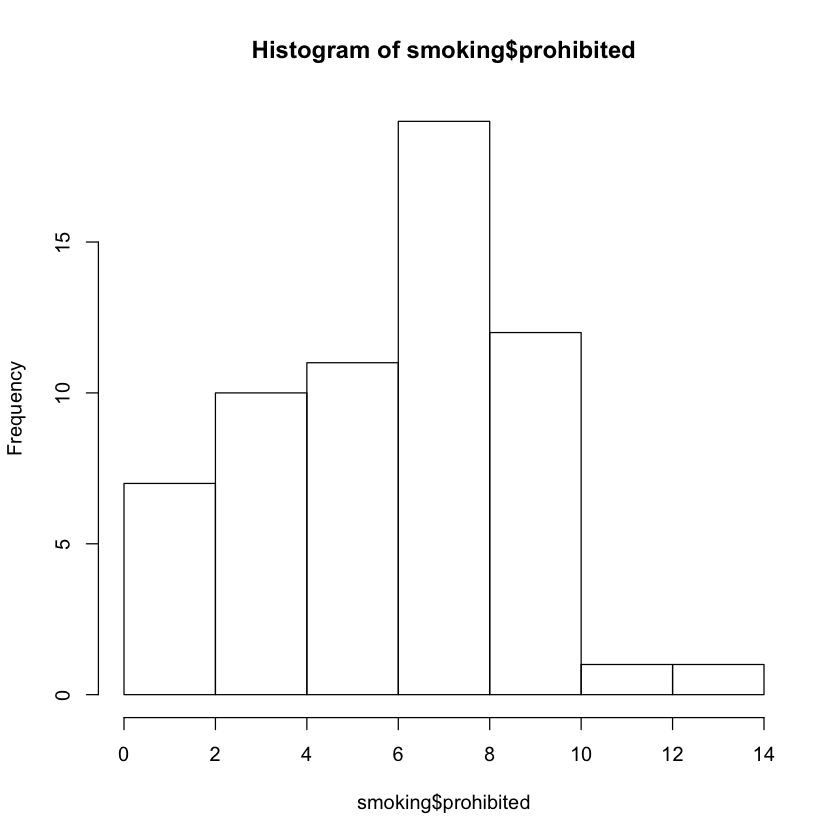

In [54]:
hist(smoking$prohibited)

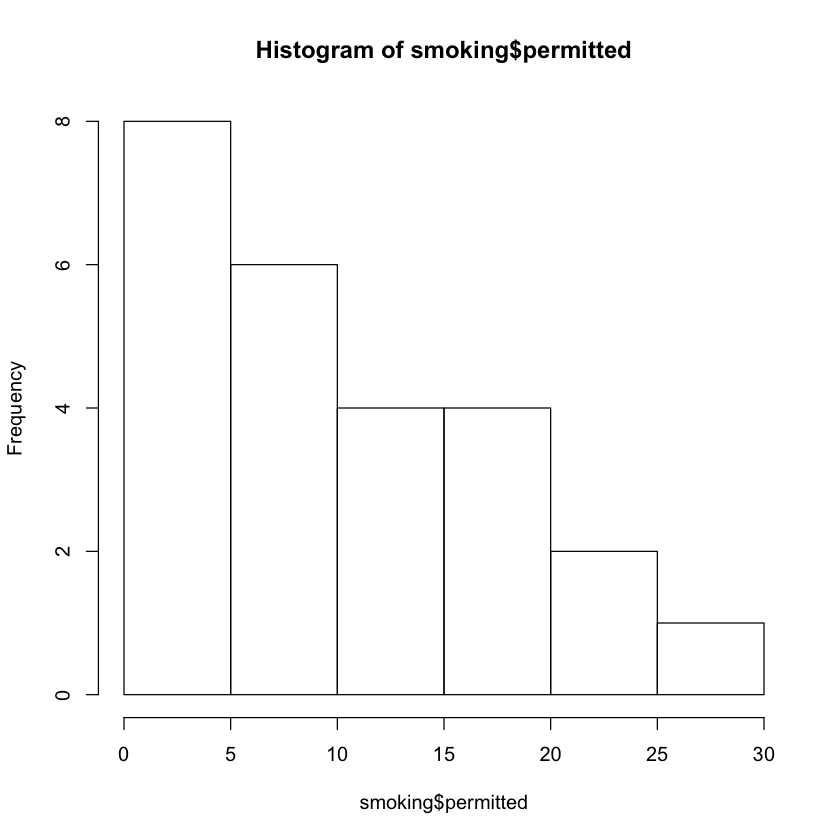

In [55]:
hist(smoking$permitted)

**5. Are there outliers?**<br>
There appears to be a couple of outliers.

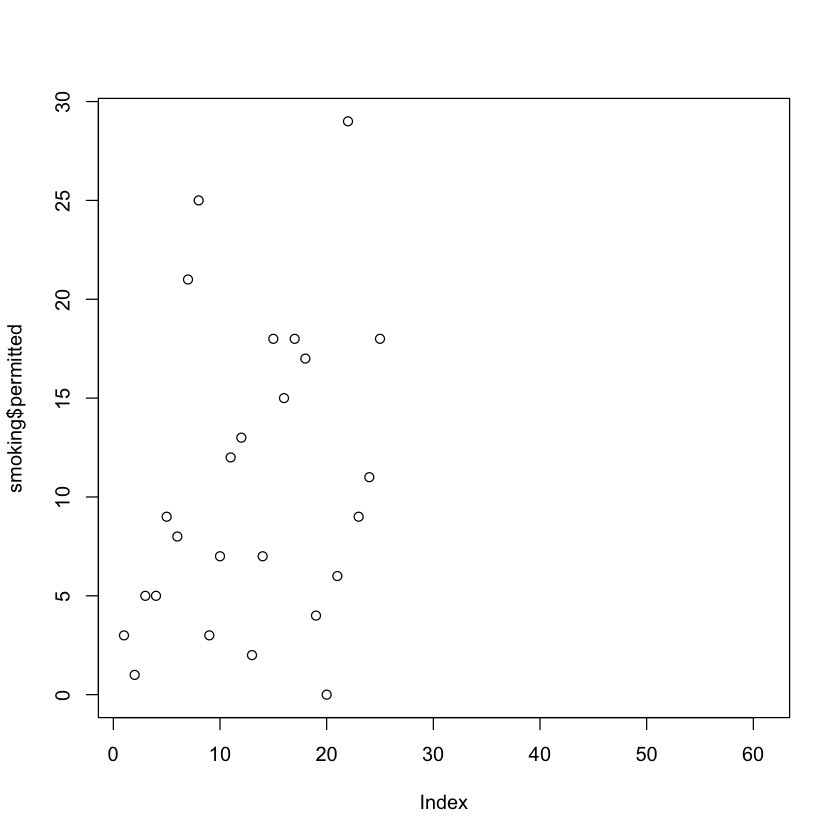

In [60]:
plot(smoking$permitted)

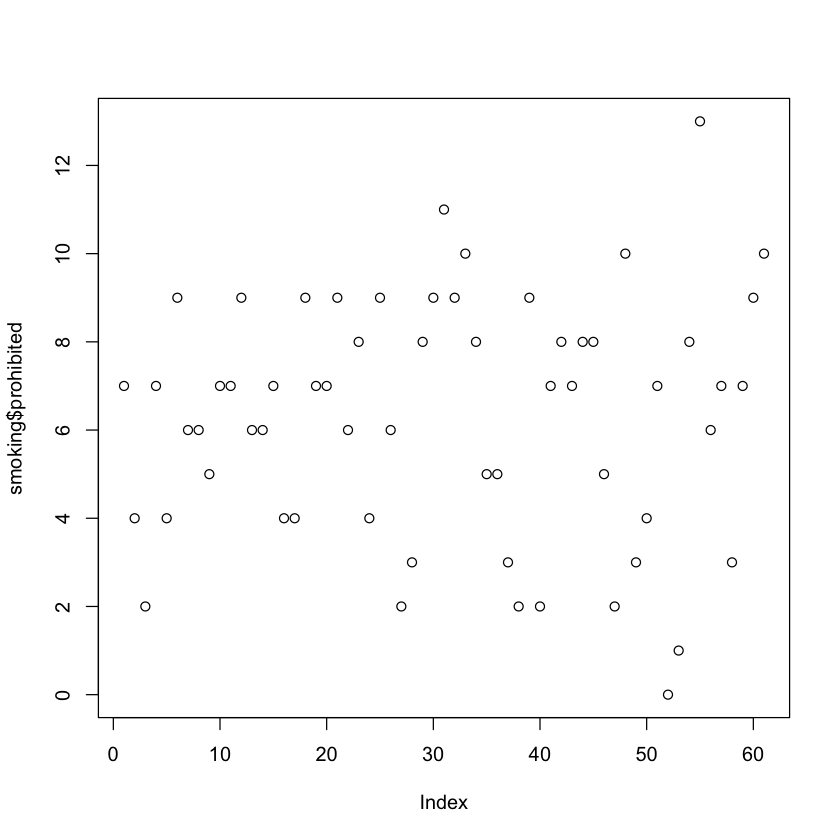

In [61]:
plot(smoking$prohibited)

### D. 

A study was conducted to investigate the effect of physical training on the serum cholesterol level.  Thirty subjects participated in the study.  Prior to training, blood samples were taken to determine the cholesterol level of each subject.  Then the subjects were put through a training program that centered on daily running and jogging.  At the end of the training period, blood samples were taken again and a second reading on the serum cholesterol level was obtained. Is there an effect of the training on cholesterol levels?

The data is located in this working directory with the name training.csv

In [63]:
training <- read.csv('training.csv')
head(training)

Subject,Pre.training.level.x..mg.Dl.,Post.training.level.x..mg.Dl.,X,X.1,X.2
1,182,198,NA,NA,NA
2,232,210,NA,NA,NA
3,191,194,NA,NA,NA
4,210,210,NA,NA,NA
5,148,135,NA,NA,NA
6,249,220,NA,NA,NA


**1. Null and Alternative Hypotheses**<br>
Null: Serum cholesterol level is not affected by this training regiment.
Alternative: Serum cholesterol is in some way affected by the training.

**2. One-sided or Two-sided**<br>
Two-sided.

**3. Which tests are appropriate?**<br>
A Paired two-sided t-test without the same variance. This test shows that there is a significant difference in serum cholesterol; specifically, it increases post-training.

In [85]:
t.test(training$Pre.training.level.x..mg.Dl.,
      training$Post.training.level.x..mg.Dl.,
      paired=TRUE, var.equal=FALSE)


	Paired t-test

data:  training$Pre.training.level.x..mg.Dl. and training$Post.training.level.x..mg.Dl.
t = 2.2217, df = 29, p-value = 0.03427
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  2.996812 72.469854
sample estimates:
mean of the differences 
               37.73333 


Warning message in plot.window(...):
“"breaks" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"breaks" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"breaks" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"breaks" is not a graphical parameter”Warning message in box(...):
“"breaks" is not a graphical parameter”Warning message in title(...):
“"breaks" is not a graphical parameter”

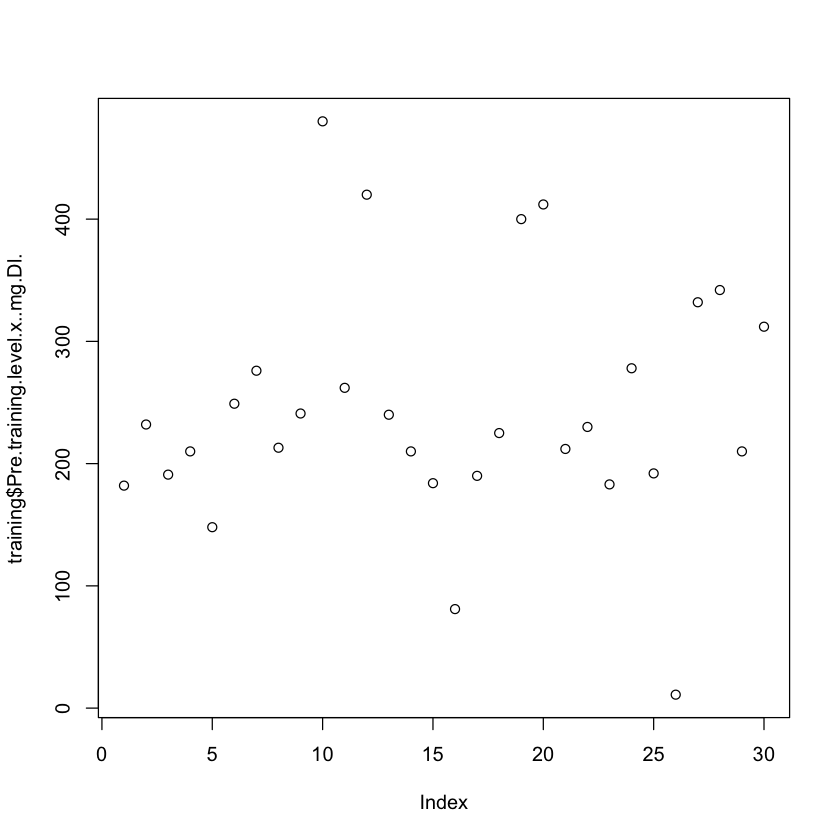

In [79]:
plot(training$Pre.training.level.x..mg.Dl., breaks = 10)

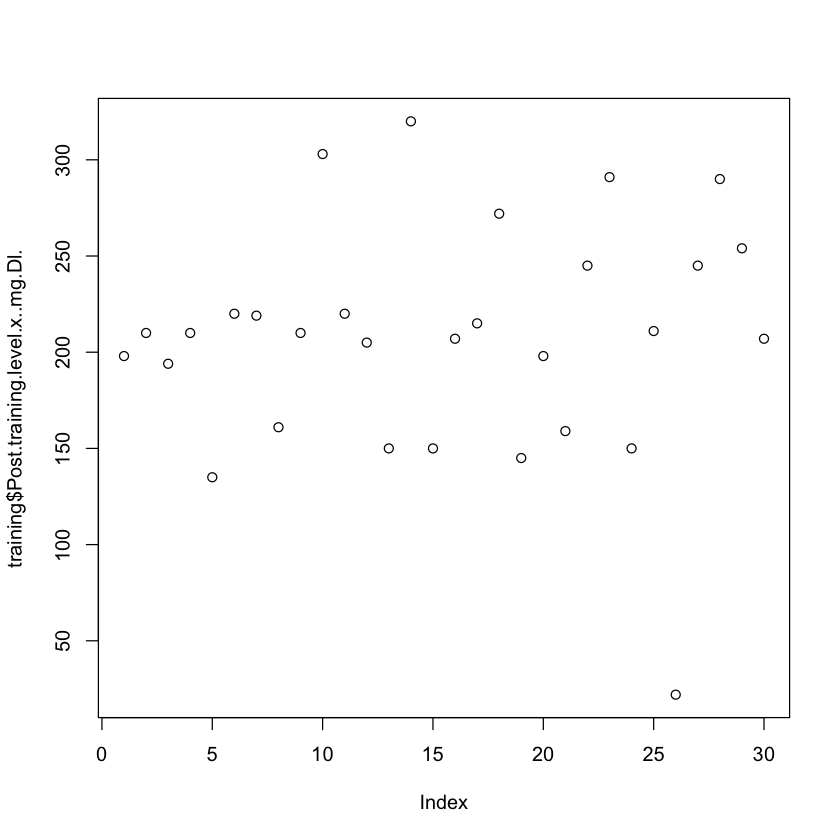

In [78]:
plot(training$Post.training.level.x..mg.Dl.)

**4. Does the data follow a normal distribution?**<br>
Yes

**5. Are there outliers?**<br>
No.